In [1]:
import math
from numpy import empty,zeros,max
from pylab import imshow,gray,show,exp,plot,sin,arcsin

n=100
xo=0.5
x=[]
x.append(xo)
for i in range (n):
    #xo= exp(1-xo**2)
    #x.append(xo)
    #xo= (1-math.log(xo))**0.5
    #x.append(xo)
    xo= (1/2)*(math.asin(xo-(xo**2)))
    x.append(xo)
plot(x)
print(xo)
show()

1.5661883104263938e-31


<Figure size 640x480 with 1 Axes>

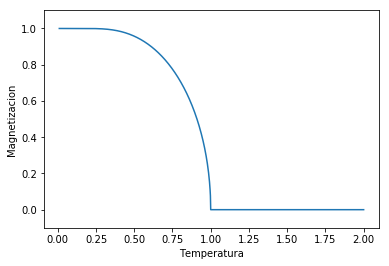

In [2]:
from math import tanh,cosh
from numpy import linspace
from pylab import plot,show,ylim,xlabel,ylabel

Tmax= 2.0
n= 1000
er= 1e-6

y=[]
temp=linspace(0.01,Tmax,n)

for T in temp:
    m1 = 1.0
    error=1.0
    
    while error>er:
        m1,m2=tanh(m1/T),m1
        error=abs((m1-m2)/(1-T*cosh(m2/T)**2))
        
    y.append(m1)
    
plot(temp,y)
ylim(-0.1,1.1)
xlabel("Temperatura")
ylabel("Magnetizacion")
show()

# Ejemplo 9.1: Solcuión de la Ecuación de Laplace:

Vamos a computar una solución a el problema electrostacio bi-dimensional de la Fig. 9.1. usando el metodo de Jacobi, para el caso en que la caja es de un metro a lo largo de cada lado, $V=1 volt$, y el espacido de la rejilla $a=1 cm$, entonces hay 100 puntos de la rejilla en cada lado, o 101 si contamos los puntos en el inicio y el final. Aqui hay un programa para calcular la solución y hacer un grafico de la densidad de los resultados:

In [ ]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

#Constantes
M = 100        #Cuadrados de rejilla en un lado
V = 1.0        #Voltaje en el muro tope 
target = 1e-6  #Precisión 

#Creando arrays para guardar los valores de potencial
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phiprime = empty([M+1,M+1],float)

#Main loop
delta = 1.0
while delta>target:
    
    #Calcular los nuevos valores de potencial
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
                
    #Calculando la diferencia maxima de los valores viejos
    delta = max(abs(phi-phiprime))
                
    #Cambiando los dos arrays
    phi,phiprime = phiprime,phi
                
#Hacer grafico
imshow(phi)
gray()
show()

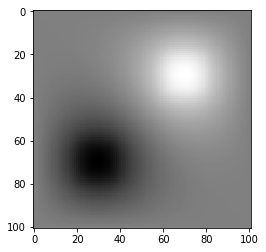

In [3]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

#Constantes
M = 100        #Cuadrados de rejilla en un lado
V = 1.0        #Voltaje en el muro tope 
target = 1e-6  #Precisión 
#e_o=8.6841878176e-12 #Permitividad electrica del vacio


#Creando arrays para guardar los valores de potencial
phi = zeros([M+1,M+1],float)
phi[0,:] = 0
ro = zeros([M+1,M+1],float)
ro[60:80,20:40]=-1.0
ro[20:40,60:80]=1.0
phiprime = empty([M+1,M+1],float)

#Main loop
delta = 1.0
while delta>target:
    
    #Calcular los nuevos valores de potencial
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4+(ro[i,j])/4
                
    #Calculando la diferencia maxima de los valores viejos
    delta = max(abs(phi-phiprime))
                
    #Cambiando los dos arrays
    phi,phiprime = phiprime,phi
                
#Hacer grafico
imshow(phi)
gray()
show()